# Mean vs Median Illusion: When the Average Is Not Typical

## 1. Conceptual Motivation

Trong nhiều báo cáo kinh tế, tài chính, hoặc thu nhập xã hội,
người ta thường công bố **giá trị trung bình (mean)**.

Tuy nhiên, trong các phân phối lệch (skewed distributions),
mean có thể không đại diện cho trải nghiệm điển hình của đa số quan sát.

Câu hỏi trung tâm của notebook này:

> Khi nào mean không còn phản ánh "typical outcome"?

Ta sẽ nghiên cứu hiện tượng này thông qua phân phối lognormal —
một phân phối có tail phải dày (right-skewed).

In [1]:
import pandas as pd
import seaborn as sns

from src import (
    generate_lognormal_data,
    compute_mean_median_gap,
    compute_quantiles,
    plot_mean_median,
)

sns.set_theme(style="whitegrid")
pd.set_option("display.precision", 4)

## 2. Data-Generating Process

Ta sinh dữ liệu từ phân phối lognormal:

- log(X) ~ Normal(μ, σ)
- X > 0
- Tail phải dày khi σ lớn

In [2]:
df = generate_lognormal_data(
    n=10000,
    mu=0.0,
    sigma=1.0,
    seed=42
)

df.head()

,value
0,1.3562
1,0.3535
2,2.1180
3,2.5614
4,0.1421


## 3. Distribution Shape

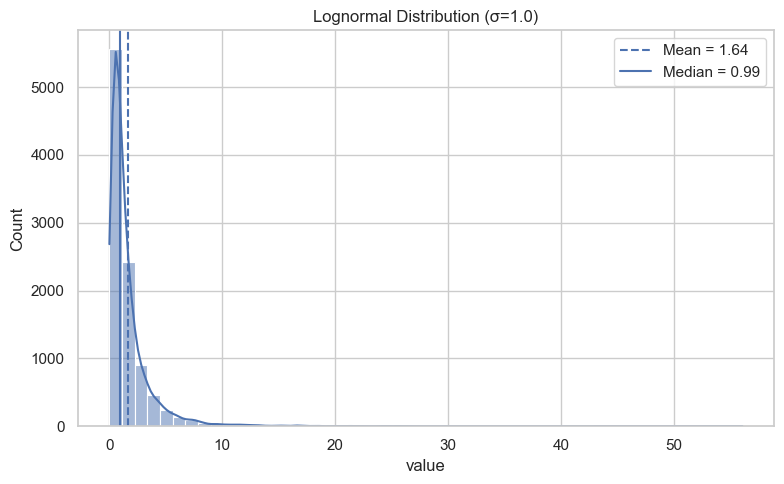

In [3]:
plot_mean_median(df["value"], title="Lognormal Distribution (σ=1.0)")

## Mean–Median Gap under Lognormal Distribution (σ = 1.0)

Từ kết quả quan sát:

- Mean ≈ 1.64
- Median ≈ 0.99

Nhận xét:

1. Mean lớn hơn median một cách đáng kể (~65%).
2. Phần lớn dữ liệu tập trung gần 0–2, nhưng tồn tại một số giá trị rất lớn ở tail phải.
3. Những giá trị cực lớn này có xác suất nhỏ, nhưng có ảnh hưởng rất mạnh lên mean.

---

### Giải thích cấu trúc

Với lognormal:

- log(X) ~ Normal(μ, σ)
- $ X = e^Z$

Median của $X = e^μ$

Mean của $X = e^{μ + σ²/2}$

Với μ = 0 và σ = 1:

- Median = $e^0$ = 1

- Mean = $e^{0 + 1/2}$ ≈ 1.65

Điều này khớp chính xác với kết quả thực nghiệm.

---

### Ý nghĩa

Median phản ánh "giá trị điển hình":

- 50% quan sát nằm dưới ~1

Mean phản ánh kỳ vọng toán học:

- Một số giá trị rất lớn kéo mean lên

Do đó:

> Trong phân phối lệch phải,
> mean không đại diện cho trải nghiệm của phần lớn quan sát.

## 4. Mean vs Median Comparison

In [4]:
stats = compute_mean_median_gap(df["value"])
stats

{'mean': 1.6443090079449036,
 'median': 0.9869188104474897,
 'gap': 0.6573901974974139}

## Mean–Median Gap Analysis (σ = 1.0)

Kết quả thống kê:

- Mean ≈ 1.644
- Median ≈ 0.987
- Gap ≈ 0.657

Nhận xét:

1. Mean lớn hơn median khoảng 67%.
2. Median ≈ 0.99 cho thấy giá trị "điển hình" của phân phối nằm quanh 1.
3. Mean bị kéo lên đáng kể so với median, mặc dù phần lớn quan sát không lớn như vậy.

Điều này cho thấy:

> Trong phân phối lệch phải (right-skewed),
> mean không đại diện cho trải nghiệm điển hình của đa số quan sát.

Sự chênh lệch này không phải do lỗi mẫu, mà là hệ quả cấu trúc của phân phối lognormal.

## 5. Quantile Analysis

Median chia phân phối làm hai nửa xác suất.
Ta kiểm tra các quantile để hiểu cấu trúc phân bố.

In [5]:
compute_quantiles(df["value"], quantiles=(0.1, 0.5, 0.9, 0.99))

{'q_10': 0.2688052550828302,
 'q_50': 0.9869188104474897,
 'q_90': 3.5959697556364185,
 'q_99': 10.546995012444869}

## Quantile Structure Analysis

Các quantile chính:

- 10% thấp nhất < 0.269
- 50% (median) ≈ 0.987
- 90% < 3.596
- 99% < 10.547

Nhận xét:

1. 90% quan sát nhỏ hơn khoảng 3.6.
2. Tuy nhiên 1% cao nhất có thể vượt quá 10, tạo ra một tail phải dài.
3. Mean = 1.644 nằm phía trên median khá xa, mặc dù 50% dữ liệu nằm dưới ~1.

Điều này cho thấy:

> Một phần nhỏ quan sát có giá trị rất lớn
> có ảnh hưởng mạnh đến mean.

Phân phối có cấu trúc:

- Khối lượng xác suất tập trung gần 0–2
- Tail kéo dài sang phải

Chính tail này tạo ra Mean–Median Illusion.

## 6. Effect of Increasing Volatility

Ta tăng σ để xem khoảng cách giữa mean và median thay đổi thế nào.

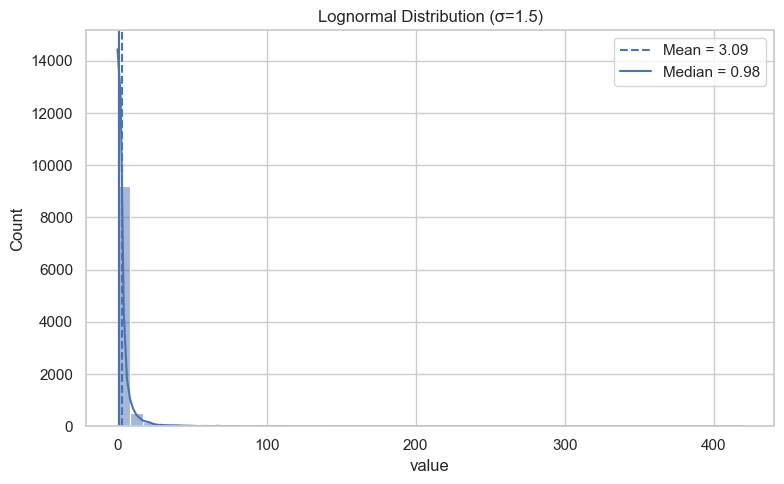

In [6]:
df_high_sigma = generate_lognormal_data(
    n=10000,
    mu=0.0,
    sigma=1.5,
    seed=42
)

plot_mean_median(df_high_sigma["value"], title="Lognormal Distribution (σ=1.5)")

In [7]:
compute_mean_median_gap(df_high_sigma["value"])

{'mean': 3.0921130601912497,
 'median': 0.9804425264893564,
 'gap': 2.1116705337018935}

## Mean–Median Gap under Higher Volatility (σ = 1.5)

Kết quả thống kê:

- Mean ≈ 3.09
- Median ≈ 0.98
- Gap ≈ 2.11

Nhận xét:

1. Median gần như không thay đổi so với σ = 1.0 (vẫn ≈ 1).
2. Mean tăng mạnh từ ~1.64 lên ~3.09.
3. Khoảng cách mean–median tăng hơn 3 lần (từ ~0.66 lên ~2.11).

Điều này cho thấy:

> Khi độ biến động σ tăng,
> mean tăng theo cấp số mũ,
> trong khi median gần như giữ nguyên.

Nói cách khác:

Phần lớn quan sát vẫn tập trung quanh ~1,
nhưng một số ít giá trị cực lớn kéo mean lên rất mạnh.

## 7. Structural Interpretation: Why the Gap Explodes

Với phân phối lognormal:

$$ Median = e^μ $$

$$ Mean = e^(μ + σ²/2)$$

Khi μ = 0:

- Median = 1 (không phụ thuộc σ)
- Mean = $e^{σ²/2}$

Với:

σ = 1.0  → Mean ≈ 1.65
σ = 1.5  → Mean ≈ 3.08

Mean tăng theo hàm mũ của σ².

Điều này có nghĩa:

- Độ lệch (volatility) không chỉ làm phân phối rộng hơn.
- Nó làm tail phải trở nên cực kỳ nặng.

Vì mean là tích phân của x * f(x),
những giá trị rất lớn ở tail,
dù xác suất nhỏ,
vẫn có ảnh hưởng rất mạnh đến mean.

Do đó:

> Trong hệ có tail dày,
> expectation phản ánh ảnh hưởng của cực trị,
> chứ không phản ánh trải nghiệm điển hình.

Đây là cơ chế cốt lõi phía sau Mean–Median Illusion.

## 8. Broader Implications

Hiện tượng này xuất hiện trong:

- Thu nhập xã hội
- Lợi nhuận đầu tư
- Phân phối tài sản
- Multiplicative growth systems

Khi phân phối có tail dày:

- Mean phản ánh tổng giá trị kỳ vọng
- Median phản ánh trải nghiệm điển hình

Hai khái niệm này có thể tách rời đáng kể.

Mean vs Median Illusion cho thấy:

> Giá trị trung bình không phải lúc nào cũng đại diện cho đa số quan sát.